In [1]:
%load_ext autoreload
%autoreload 2
import os
from pathlib import Path

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
import xarray as xr
from pylab import cm

import drama.geo as sargeo
import drama.utils as drtls
from stereoid.oceans import (
    RetrievalModel,
    ObsGeo,
    SceneGenerator,
    RadarModel,
    #read_GoM_scenario,
    FwdModelRIM,
)
from drama.geo.derived_geo import BistaticRadarGeometry
from stereoid.oceans.read_scenario_California import read_scenario_California
import stereoid.sar_performance as strsarperf
import stereoid.utils.config as st_config
import stereoid.oceans.visualization.geo_plot as gplt
from stereoid.oceans.tc_scenario import tc_wake_kudry19, tc_wake_scene

In [7]:
user_cfg_path = Path("~/Code/Tropical Cyclones/user.cfg").expanduser()
paths = st_config.parse(user_cfg_path, section="Paths")
# Unpack the paths read from user.cfg. If user.cfg is not found user_defaults.cfg is used.
paths = st_config.parse(user_cfg_path, section="Paths")
stereoid_dir = paths["stereoid"]
pardir = paths["par"]
resultsdir = paths["results"]
datadir = paths["data"]

tc_dir = Path("~/Datasets/TCs").expanduser()
tcsname = 'maria'
tc_heading = -90
if tcsname == 'hector':
    tc_name = 'hector2018'
    input_file = tc_dir  / "hector2018" / "hector2018_10082018_input.mat"
elif tcsname == 'maria':
    tc_name = 'maria2017'
    lon0 = -68
    tc_heading = -60
    input_file = tc_dir / "maria2017" / "maria2017_21092017_input.mat"
else:
    tc_name = 'jimena2015'
    input_file = tc_dir / "jimena2017" / "jimena2015_03092015_input.mat"
    lon0 = -143.5
    tc_heading = -60

runid = "XTI_finalists"
parfile = pardir.joinpath("Hrmny_%s.cfg" % runid)
    
b_ati = 10
scndir = os.path.join(datadir, "Ocean/Scenarios")

plotdir = os.path.join(os.path.join(resultsdir, "OceanE2E"), tcsname)
plotdir = os.path.join(plotdir, "%4.1f" % b_ati)
fwddir = os.path.join(datadir, "ScatteringModels/Oceans")


# plotdir = os.path.join(os.path.join(resultsdir, "OceanE2E"), "California")
# plotdir = os.path.join(plotdir, "%4.1f" % b_ati)
niceplotdir = os.path.join(plotdir,'nice')
os.makedirs(niceplotdir, exist_ok=True)
scnname=tc_name

/home/andreas/miniconda3/envs/tcs/lib/python3.10/site-packages /home/andreas/Code/Tropical Cyclones/user.cfg
/home/andreas/miniconda3/envs/tcs/lib/python3.10/site-packages /home/andreas/Code/Tropical Cyclones/user.cfg


# Load results and inputs

In [8]:
xrL1 = xr.open_dataset(os.path.join(plotdir,"L1data.nc"))
xrL2 = xr.open_dataset(os.path.join(plotdir,"L2data.nc"))
#cali_data, dx = read_scenario_California(os.path.join(scndir, scn_file), smp_out=1e3)
tc_dict = tc_wake_kudry19(input_file)
tc_data, dx = tc_wake_scene(tc_dict, smp_out=1e3, orb_heading=0, tc_heading=tc_heading, lon0=lon0)
xrInput = xr.Dataset({"U10s":(("az", "gr"), np.linalg.norm(tc_data["wnd"], axis=-1)),
                      "SST":(("az","gr"), np.where(tc_data["wnd"][:,:,0] == 0,np.nan, tc_data["sst"])),
                      "SSHA":(("az","gr"), np.where(tc_data["wnd"][:,:,0] == 0,np.nan, tc_data["ssha"])),
                      "latitude":(("az","gr"), tc_data["lat"]),
                      "longitude":(("az","gr"), tc_data["lon"])})

20.726492094151638
36875.22928
Computing Baroclinic response
(201, 251)


In [9]:
ssha = xr.open_dataset(os.path.join(plotdir,"ssha.nc"))

In [10]:
tc_dict['lat0']

20.726492094151638

24.445517370406456

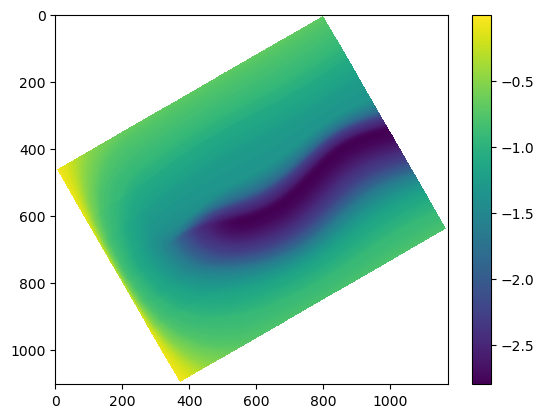

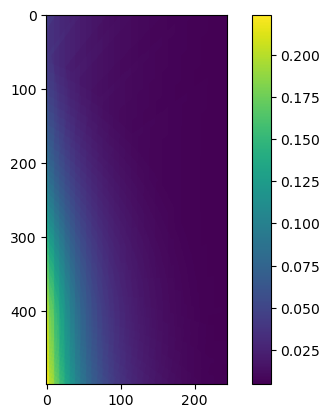

In [11]:
#tc_data["lat"][
mskind = np.argwhere(tc_data["lat"] != 0)
mskind[:,0]
latmin = np.nanmin(tc_data["lat"])
latmax = np.nanmax(tc_data["lat"])
lonmin = np.nanmin(tc_data["lon"])
lonmax = np.nanmax(tc_data["lon"])
plt.figure()
plt.imshow(xrInput.SST.values)
plt.colorbar()
xrInput.SST.values.shape
plt.figure()
plt.imshow(xrL1.NRCS.values[:,:,0])
plt.colorbar()
np.log10(xrL1.NRCS.values).min()
np.nanmin(xrInput.SST.values)
latmax

In [12]:
ssha

<xarray.Dataset>
Dimensions:        (az: 500, gr: 245, sat: 1)
Coordinates:
  * gr             (gr) float64 3.694e+05 3.714e+05 ... 8.554e+05 8.574e+05
  * az             (az) float64 0.0 1e+03 4e+03 ... 2.47e+08 2.48e+08 2.49e+08
  * sat            (sat) object 'HA'
Data variables:
    est_ssha       (az, gr) float64 ...
    est_ssha_fil   (az, gr) float64 ...
    est_ssha_7by7  (az, gr) float64 ...
    latitude       (az, gr) float64 ...
    longitude      (az, gr) float64 ...
    incm           (az, gr) float64 ...

In [14]:
figures_dir = os.path.join(plotdir, "2023-11-01")
os.makedirs(figures_dir, exist_ok=True)

/tmp/ipykernel_66844/3381438188.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gplt.geoplot(ssha, "est_ssha_fil", sat="HA", cmap=cm.get_cmap('Spectral', 10), vmin=-0.28, vmax=0.08, figsize=(10, 10),
/tmp/ipykernel_66844/3381438188.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  lat_range=[latmin, latmax], lon_range=[lonmin, lonmax], basedata=xrInput, bcmap=cm.get_cmap('BrBG',20), bvarname='SSHA', alpha=1,bmin=-0.28, bmax=0.08, txt=["SSHA 5 km"], cblabelcolor="white")


-0.5864208321777394
0.5380650964198859


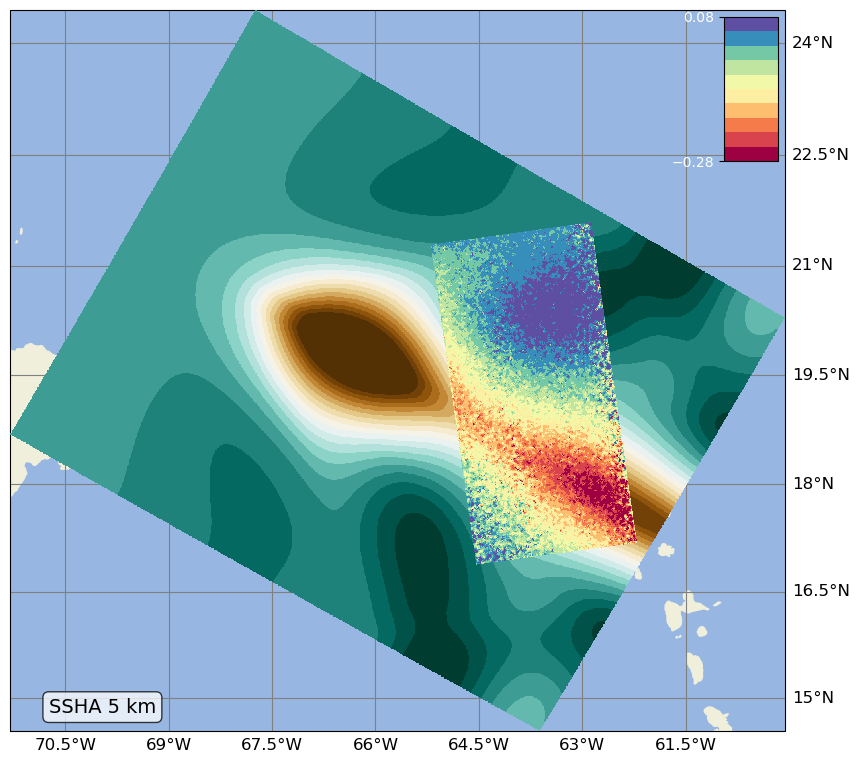

In [16]:
gplt.geoplot(ssha, "est_ssha_fil", sat="HA", cmap=cm.get_cmap('Spectral', 10), vmin=-0.28, vmax=0.08, figsize=(10, 10),
                 lat_range=[latmin, latmax], lon_range=[lonmin, lonmax], basedata=xrInput, bcmap=cm.get_cmap('BrBG',20), bvarname='SSHA', alpha=1,bmin=-0.28, bmax=0.08, txt=["SSHA 5 km"], cblabelcolor="white")
plt.savefig(os.path.join(figures_dir, ('%s_est_ssha_5km.png' % scnname)), dpi=300, bbox_inches='tight', transparent=True)

/tmp/ipykernel_66844/4150322237.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gplt.geoplot(ssha, "est_ssha", sat="HA", cmap=cm.get_cmap('Spectral', 10), vmin=-0.28, vmax=0.08, figsize=(10, 10),
/tmp/ipykernel_66844/4150322237.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  lat_range=[latmin, latmax], lon_range=[lonmin, lonmax], basedata=xrInput, bcmap=cm.get_cmap('BrBG',20), bvarname='SSHA', alpha=1,bmin=-0.28, bmax=0.08, txt=["SSHA 1 km"], cblabelcolor="white")


-1.7925570582549617
1.3018714394300446


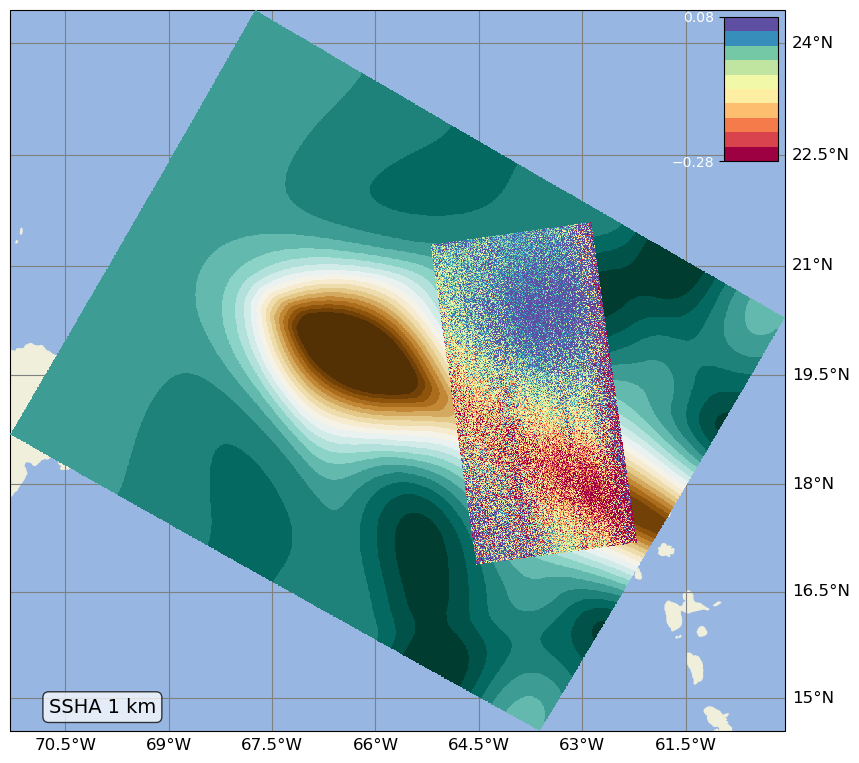

In [18]:
gplt.geoplot(ssha, "est_ssha", sat="HA", cmap=cm.get_cmap('Spectral', 10), vmin=-0.28, vmax=0.08, figsize=(10, 10),
                 lat_range=[latmin, latmax], lon_range=[lonmin, lonmax], basedata=xrInput, bcmap=cm.get_cmap('BrBG',20), bvarname='SSHA', alpha=1,bmin=-0.28, bmax=0.08, txt=["SSHA 1 km"], cblabelcolor="white")
plt.savefig(os.path.join(figures_dir,('%s_est_ssha_1km.png' % scnname)), dpi=300, bbox_inches='tight', transparent=True)

/tmp/ipykernel_17590/258947222.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gplt.geoplot(ssha, "est_ssha_7by7", sat="HA", cmap=cm.get_cmap('Spectral', 10), vmin=-0.28, vmax=0.08, figsize=(10, 10),
/tmp/ipykernel_17590/258947222.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  lat_range=[latmin, latmax], lon_range=[lonmin, lonmax], basedata=xrInput, bcmap=cm.get_cmap('BrBG',20), bvarname='SSHA', alpha=1,bmin=-0.28, bmax=0.08, txt=["SSHA 7 km"], cblabelcolor="white")


-0.45125546869435496
0.362814844891186


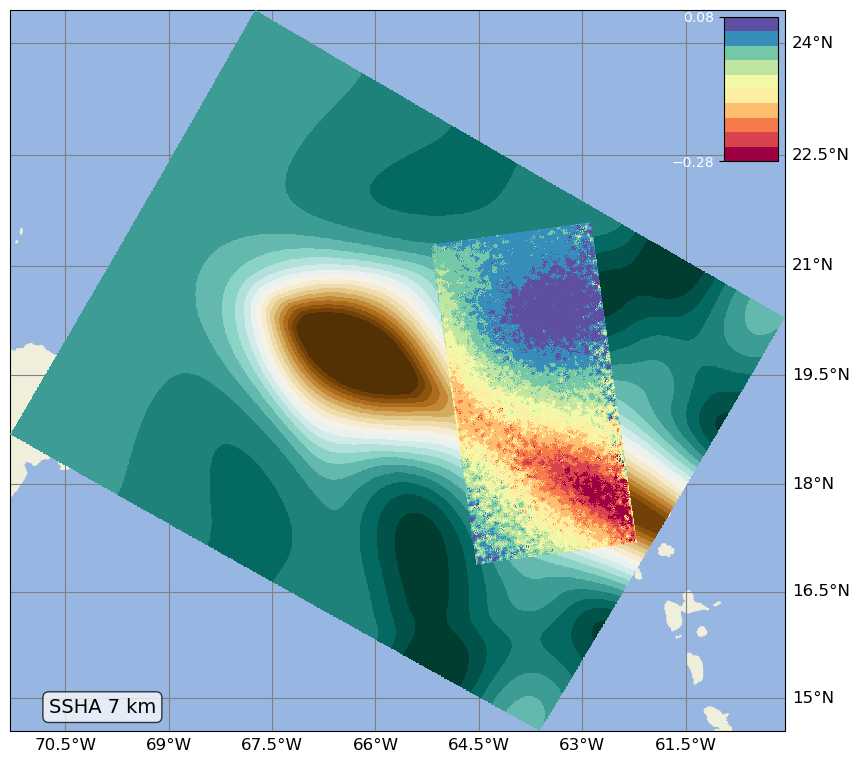

In [59]:
gplt.geoplot(ssha, "est_ssha_7by7", sat="HA", cmap=cm.get_cmap('Spectral', 10), vmin=-0.28, vmax=0.08, figsize=(10, 10),
                 lat_range=[latmin, latmax], lon_range=[lonmin, lonmax], basedata=xrInput, bcmap=cm.get_cmap('BrBG',20), bvarname='SSHA', alpha=1,bmin=-0.28, bmax=0.08, txt=["SSHA 7 km"], cblabelcolor="white")
plt.savefig(os.path.join(niceplotdir,('%s_est_ssha_7km.png' % scnname)), dpi=300, bbox_inches='tight')

# Show model inputs

/tmp/ipykernel_17590/2510217233.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gplt.geoplot(xrInput, "SST", sat='HA', cmap=cm.get_cmap('inferno',20),bvarname="SST",vmin=-4, vmax=0,


nan
nan


/tmp/ipykernel_17590/2510217233.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  gplt.geoplot(xrInput, "SSHA", sat='HA', cmap=cm.get_cmap('plasma',20),bvarname="SST",vmin=-0.4, vmax=0.1,


nan
nan
nan
nan
0.0
62.91431942520189


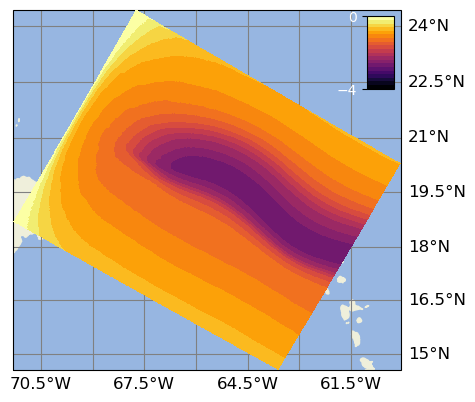

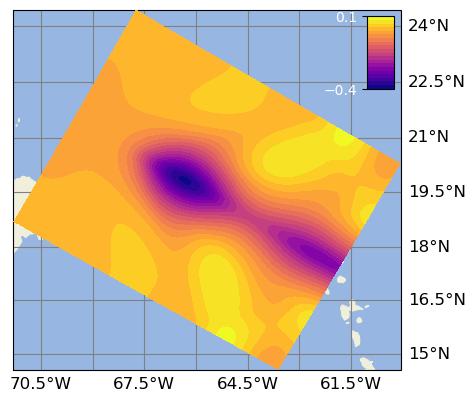

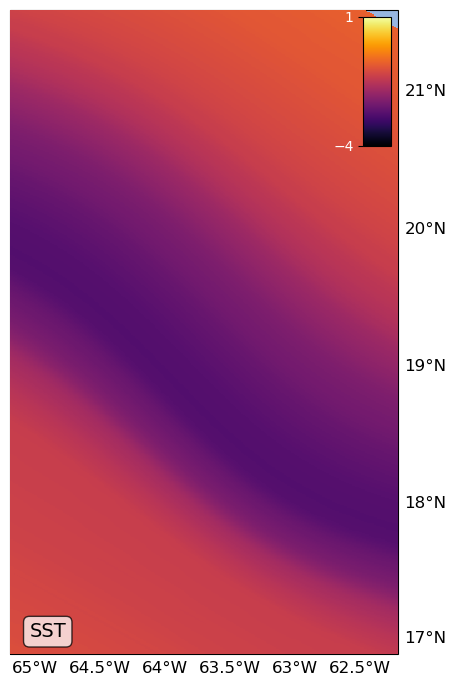

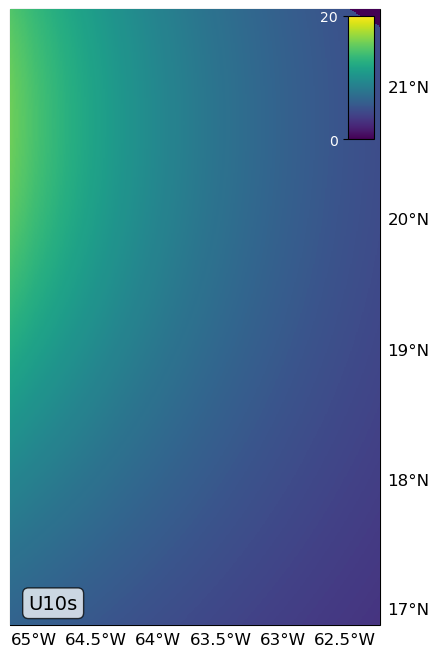

In [9]:
lon_range = [xrL1.longitude.values[2:-2].min(), xrL1.longitude.values[2:-2].max()]
lat_range = [xrL1.latitude.values[2:-2].min(), xrL1.latitude.values[2:-2].max()]
gplt.geoplot(xrInput, "SST", sat='HA', cmap=cm.get_cmap('inferno',20),bvarname="SST",vmin=-4, vmax=0,
            lat_range=[latmin, latmax], lon_range=[lonmin, lonmax],figsize=(5, 10), cblabelcolor="white")
plt.savefig(os.path.join(niceplotdir,('%s_inputSST_full.png' % scnname)), dpi=300)
# SSHA
gplt.geoplot(xrInput, "SSHA", sat='HA', cmap=cm.get_cmap('plasma',20),bvarname="SST",vmin=-0.4, vmax=0.1,
            lat_range=[latmin, latmax], lon_range=[lonmin, lonmax],figsize=(5, 10), cblabelcolor="white")
plt.savefig(os.path.join(niceplotdir,('%s_inputSSHA_full.png' % scnname)), dpi=300)

gplt.geoplot(xrInput, "SST", sat='HA', cmap='inferno',bvarname="U10s",vmin=-4, vmax=1,
             lat_range=lat_range, lon_range=lon_range, txt='SST',figsize=(5, 10), cblabelcolor="white")
#plt.tight_layout()
plt.savefig(os.path.join(niceplotdir,('%s_inputSST.png' % scnname)), dpi=300, bbox_inches='tight')
gplt.geoplot(xrInput, "U10s", sat='HA', cmap='viridis',bvarname="U10s",vmin=0, vmax=20,
             lat_range=lat_range, lon_range=lon_range, txt='U10s',figsize=(5, 8), cblabelcolor="white")
#plt.tight_layout()
plt.savefig(os.path.join(niceplotdir,('%s_inputU10s.png' % scnname)), dpi=300,bbox_inches='tight')

/tmp/ipykernel_17590/2964634595.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('inferno',20), bvarname='SST',bmin=-4, bmax=0, scale=15,
/tmp/ipykernel_17590/2964634595.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1, scale=15,


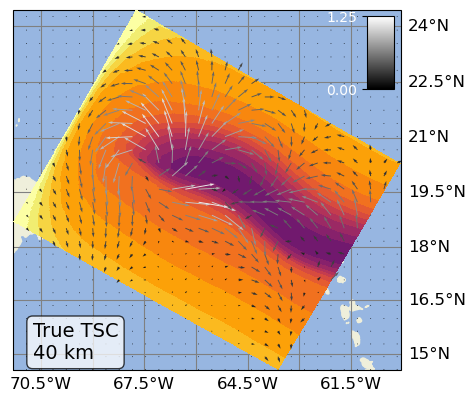

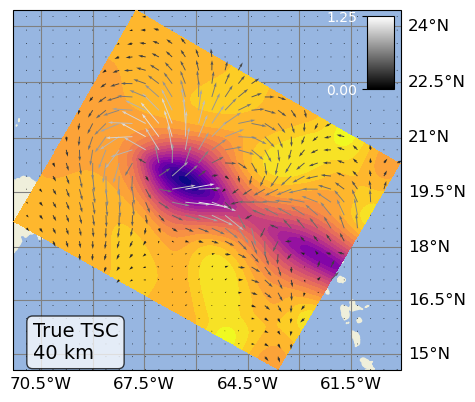

In [11]:
# Surface current stream
true_TSC = tc_data["tsc"]
true_U10s = tc_data["wnd"]
# Prepare data a bit
true_TSC = gplt.rot_vect(true_TSC, northing_rad=-np.radians(90))
true_TSC[np.isnan(true_TSC)] = 0
true_U10s = gplt.rot_vect(true_U10s, northing_rad=-np.radians(90))
true_U10s[np.isnan(true_U10s)] = 0

# plt.figure()
# plt.quiver(np.arange(true_TSC.shape[1])[::50],np.arange(true_TSC.shape[0])[::50], 
#            true_TSC[::50,::50,0],true_TSC[::50, ::50, 1],
#            scale=20)
decim = 40
gplt.geoquiver(xrInput, true_TSC, decim=decim, vmin=0, vmax=1.25,cmap="gray",figsize=(5, 5),
               basedata=xrInput, bcmap=cm.get_cmap('inferno',20), bvarname='SST',bmin=-4, bmax=0, scale=15,
               lat_range=[latmin, latmax], lon_range=[lonmin, lonmax],
               txt=['True TSC', '%i km' % decim], cblabelcolor="white")   
plt.savefig(os.path.join(niceplotdir,('%s_inputTSCoverSST_full_%ikm.png' % (scnname,decim))), dpi=300)
gplt.geoquiver(xrInput, true_TSC, decim=decim, vmin=0, vmax=1.25,cmap="gray",figsize=(5, 5),
               basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1, scale=15,
               lat_range=[latmin, latmax], lon_range=[lonmin, lonmax],
               txt=['True TSC', '%i km' % decim], cblabelcolor="white")   
plt.savefig(os.path.join(niceplotdir,('%s_inputTSCoverSSHA_full_%ikm.png' % (scnname,decim))), dpi=300)

# L1 data


/tmp/ipykernel_17590/1162845317.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=1,bmin=-0.4, bmax=0.1,


-23.727038733112664
-7.1208700620286


/tmp/ipykernel_17590/1162845317.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=1,bmin=-0.4, bmax=0.1,


-23.229804960823415
-6.518192454468804


/tmp/ipykernel_17590/1162845317.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=1,bmin=-0.4, bmax=0.1,


-23.712643878794598
-8.910160988899321


/tmp/ipykernel_17590/1162845317.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=0.8,bmin=-0.4, bmax=0.1,


-23.727038733112664
-7.1208700620286


/tmp/ipykernel_17590/1162845317.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=0.8,bmin=-0.4, bmax=0.1,


-23.229804960823415
-6.518192454468804


/tmp/ipykernel_17590/1162845317.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=0.8,bmin=-0.4, bmax=0.1,


-23.712643878794598
-8.910160988899321


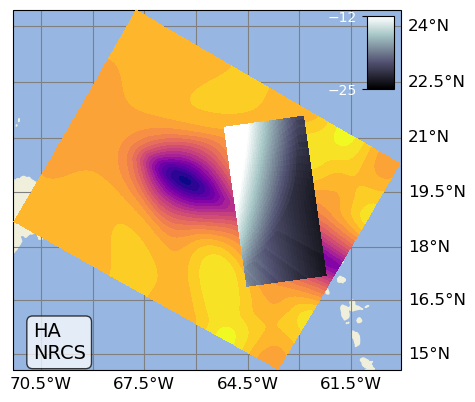

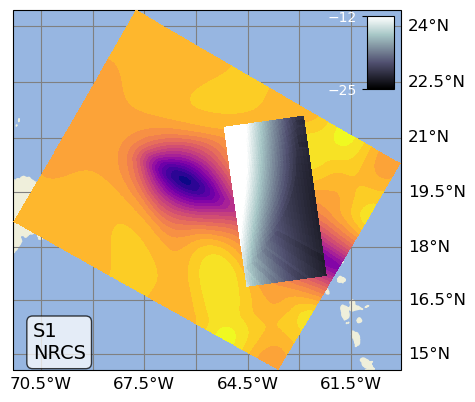

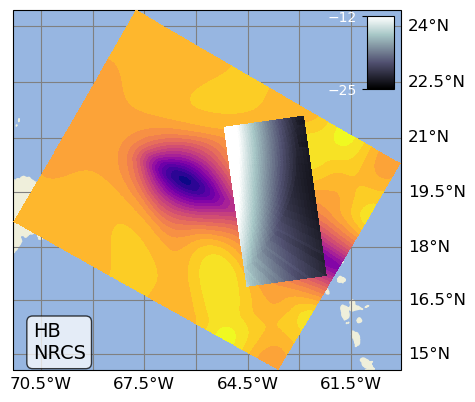

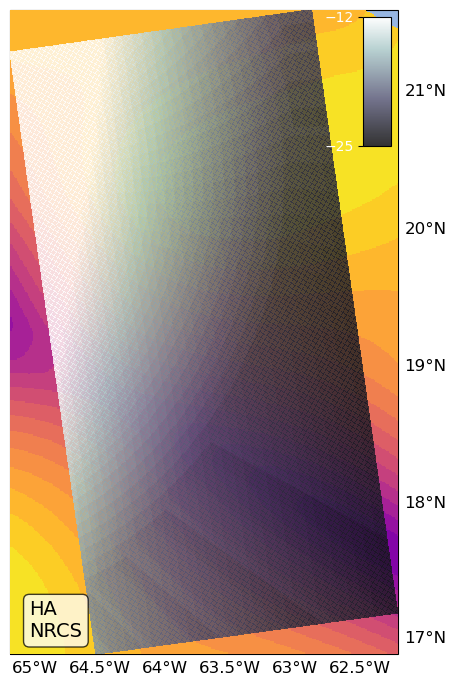

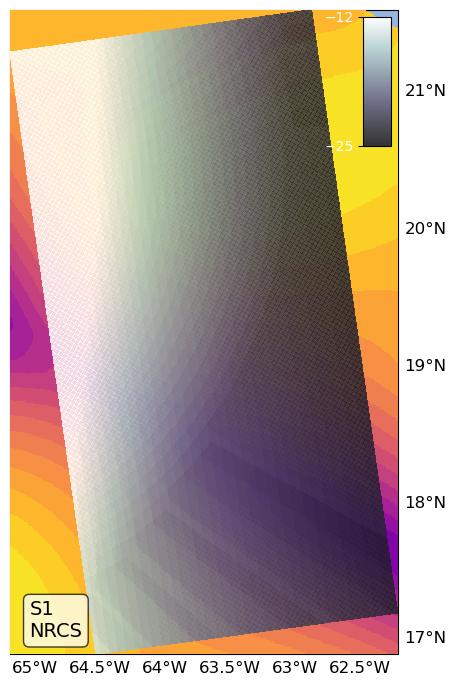

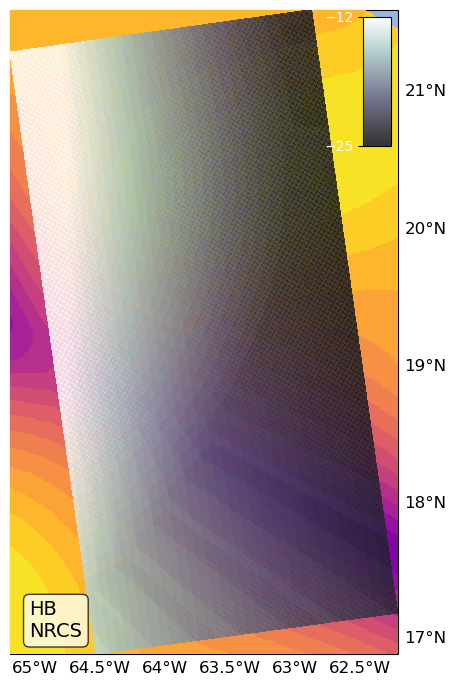

In [13]:
sats = ['HA', 'S1',  'HB']
for sat in sats:
    gplt.geoplot(xrL1, "NRCS", sat=sat, cmap='bone',vmin=-25, vmax=-12,figsize=(5, 5),
                 lat_range=[latmin, latmax], lon_range=[lonmin, lonmax], db=True,
                 basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=1,bmin=-0.4, bmax=0.1,
                 txt=[sat,'NRCS'], cblabelcolor="white")
    plt.savefig(os.path.join(niceplotdir,('%s_NRCSoverSSHA_full_%s.png' % (scnname, sat))), dpi=300,bbox_inches='tight')
for sat in sats:
    gplt.geoplot(xrL1, "NRCS", sat=sat, cmap='bone',vmin=-25, vmax=-12,figsize=(5, 10),
                 lat_range=lat_range, lon_range=lon_range, db=True,
                 basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=0.8,bmin=-0.4, bmax=0.1,
                 txt=[sat,'NRCS'], cblabelcolor="white")
    plt.savefig(os.path.join(niceplotdir,('%s_NRCSoverSSHA_%s.png' % (scnname, sat))), dpi=300,bbox_inches='tight')


In [ ]:
for sat in sats:
    gplt.geoplot(xrL1, "GDC", sat=sat, cmap='RdBu',vmin=-40, vmax=40,figsize=(5, 10),
                 lat_range=[latmin, latmax], lon_range=[lonmin, lonmax],
                 basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=1,bmin=-0.4, bmax=0.1,
                 txt=[sat,'GDC'])
    plt.savefig(os.path.join(niceplotdir,('%s_GDCoverSSHA_full_%s.png' % (scnname, sat))), dpi=300,bbox_inches='tight')
for sat in sats:
    gplt.geoplot(xrL1, "GDC", sat=sat, cmap='RdBu',vmin=-40, vmax=40,figsize=(5, 10),
                 lat_range=lat_range, lon_range=lon_range,
                 basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA', alpha=1,bmin=-0.4, bmax=0.1,
                 txt=[sat,'GDC'])
    plt.savefig(os.path.join(niceplotdir,('%s_GDCoverSSHA_%s.png' % (scnname, sat))), dpi=300,bbox_inches='tight')

# L2

In [14]:
U10s = np.stack((xrL2.U10s_x.values, xrL2.estU10s_y.values), axis=-1)
est_U10s = np.stack((xrL2.estU10s_x.values, xrL2.estU10s_y.values), axis=-1)
est_TSC = np.stack((xrL2.estTSC_x.values, xrL2.estTSC_y.values), axis=-1)
TSC = np.stack((xrL2.TSC_x.values, xrL2.TSC_y.values), axis=-1)
# Prepare data a bit
est_U10s = gplt.rot_vect(est_U10s, northing_rad=-np.radians(98))
est_TSC = gplt.rot_vect(est_TSC, northing_rad=-np.radians(98))
TSC = gplt.rot_vect(TSC, northing_rad=-np.radians(98))
U10s = gplt.rot_vect(U10s, northing_rad=-np.radians(98))
# clean a bit TSC
TSCerr = np.linalg.norm(est_TSC - TSC, axis=-1)
est_TSC = est_TSC * (TSCerr < 1)[:,:,np.newaxis]
U10serr = np.linalg.norm(est_U10s - U10s, axis=-1)
est_U10s = est_U10s * (U10serr < 2)[:,:,np.newaxis]

/tmp/ipykernel_17590/2418206923.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1,
/tmp/ipykernel_17590/2418206923.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1,


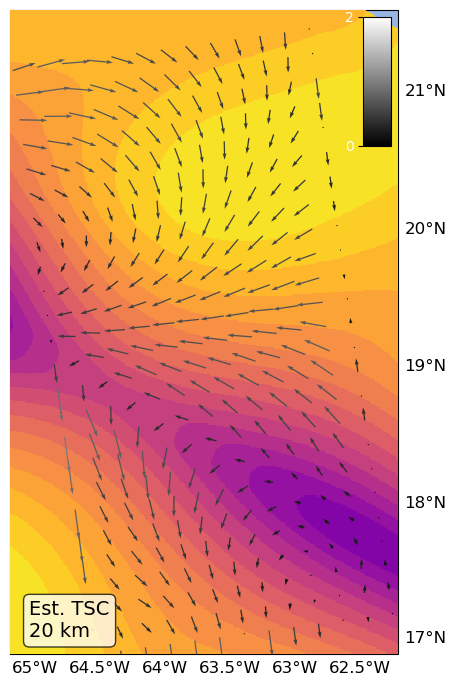

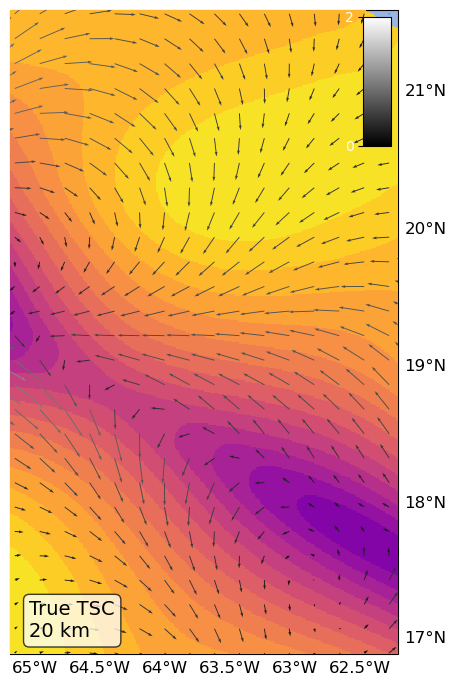

In [15]:
decim = 20
scale = 10
gplt.geoquiver(xrL2, est_TSC, decim=decim, vmin=0, vmax=2,cmap="gray",figsize=(5, 10),
               basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1,
               txt=['Est. TSC', '%i km' % decim], scale=scale, cblabelcolor="white")
plt.savefig(os.path.join(niceplotdir,('%s_estTSC_%ikm.png' % (scnname, decim))), dpi=300, bbox_inches='tight')
gplt.geoquiver(xrInput, true_TSC, decim=decim, vmin=0, vmax=2,cmap="gray",figsize=(5, 10),
               basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1,
               lat_range=lat_range, lon_range=lon_range,
               txt=['True TSC', '%i km' % decim], scale=scale, cblabelcolor="white")
plt.savefig(os.path.join(niceplotdir,('%s_trueTSC_%ikm.png' % (scnname, decim))), dpi=300, bbox_inches='tight')

In [ ]:
decim = 20
gplt.geoquiver(xrL2, est_U10s, decim=decim, vmin=0, vmax=10,cmap="gray",figsize=(5, 10),
               basedata=xrInput, bcmap='inferno', bvarname='SST',bmin=-4, bmax=0,
               txt=['Est. U10s', '%i km' % decim])
plt.savefig(os.path.join(niceplotdir,('%s_estU10s_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')
gplt.geoquiver(xrInput, true_U10s, decim=20, vmin=0, vmax=10,cmap="gray",figsize=(5, 10),
               basedata=xrInput, bcmap='inferno', bvarname='SST',bmin=-4, bmax=0,
               lat_range=lat_range, lon_range=lon_range,
               txt=['True U10s', '%i km' % decim])
plt.savefig(os.path.join(niceplotdir,('%s_trueU10s_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')

In [ ]:
decim = 4
scale = 15
lat_zoom = [18.5-0.5,18.5+0.5]
lon_zoom = [-64-0.5,-64+0.5]
gplt.geoquiver(xrL2, est_TSC, decim=decim, vmin=0, vmax=0.75,cmap="gray",figsize=(10, 10),
               basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1, scale=scale,
               lat_range=lat_zoom, lon_range=lon_zoom,
               txt=['Est. TSC', '%i km' % decim])
plt.savefig(os.path.join(niceplotdir,('%s_estTSC_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')
gplt.geoquiver(xrInput, true_TSC, decim=decim, vmin=0, vmax=0.75,cmap="gray",figsize=(10, 10),
               basedata=xrInput, bcmap=cm.get_cmap('plasma',20), bvarname='SSHA',bmin=-0.4, bmax=0.1, scale=scale,
               lat_range=lat_zoom, lon_range=lon_zoom,
               txt=['True TSC', '%i km' % decim])
plt.savefig(os.path.join(niceplotdir,('%s_trueTSC_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')

In [ ]:
decim=2
lat_zoom = np.array([0.25,-0.25]) + 35
lon_zoom = np.array([0.25,-0.25]) - 123
gplt.geoquiver(xrL2, est_U10s, decim=decim, vmin=0, vmax=15,cmap="gray",figsize=(10, 10),
               basedata=xrInput, bcmap='inferno', bvarname='SST',bmin=8, bmax=15,scale=300,
               lat_range=lat_zoom, lon_range=lon_zoom,
               txt=['Est. U10s', '%i km' % decim])
#plt.tight_layout()
plt.savefig(os.path.join(niceplotdir,('%s_estU10s_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')
gplt.geoquiver(xrL2, U10s, decim=decim, vmin=0, vmax=15,cmap="gray",figsize=(10, 10),
               basedata=xrInput, bcmap='inferno', bvarname='SST',bmin=8, bmax=15,scale=300,
               lat_range=lat_zoom, lon_range=lon_zoom,
               txt=['True U10s', '%i km' % decim])
#plt.tight_layout()
plt.savefig(os.path.join(niceplotdir,('%s_trueU10s_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')

In [ ]:
decim=2
lat_zoom = np.array([0.25,-0.25]) + 35
lon_zoom = np.array([0.25,-0.25]) - 123
mean_U10s = np.mean(np.mean(est_U10s,axis=0), axis=0).reshape(1,1,2)
gplt.geoquiver(xrL2, est_U10s-mean_U10s, decim=decim, vmin=0, vmax=10,cmap="gray",figsize=(10, 10),
               basedata=xrInput, bcmap='inferno', bvarname='SST',bmin=8, bmax=15,scale=100,
               lat_range=lat_zoom, lon_range=lon_zoom, widths=4,
               txt=['Est. $\Delta$U10s', '%i km' % decim])
#plt.tight_layout()
plt.savefig(os.path.join(niceplotdir,('%s_est_dU10s_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')

gplt.geoquiver(xrL2, est_U10s-mean_U10s, decim=decim, vmin=0, vmax=10,cmap="gray",figsize=(10, 10),
               basedata=xrInput, bcmap='inferno', bvarname='SST',bmin=8, bmax=15,scale=100,
               lat_range=lat_zoom, lon_range=lon_zoom, widths=4,
               txt=['Est. $\Delta$U10s', '%i km' % decim])

gplt.geoquiver(xrL2, U10s-mean_U10s, decim=decim, vmin=0, vmax=5,cmap="gray",figsize=(10, 10),
               basedata=xrInput, bcmap='inferno', bvarname='SST',bmin=8, bmax=15,scale=100,
               lat_range=lat_zoom, lon_range=lon_zoom,
               txt=['True $\Delta$U10s', '%i km' % decim])
#plt.tight_layout()
plt.savefig(os.path.join(niceplotdir,('%s_true_dU10s_%ikm.png' % (scnname, decim))), dpi=300,bbox_inches='tight')

In [ ]:
np.degrees(250/6300)